In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import math

In [18]:
df=load_iris()

In [21]:
dataset = pd.DataFrame(df.data, columns=df.feature_names)

In [22]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
dataset['tatget'] = df.target

In [24]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tatget
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
x,y=dataset[df.feature_names],dataset['tatget']

In [26]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, df.target, test_size=0.4, random_state=42)

In [29]:
xtrain.shape

(90, 4)

In [32]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [33]:
ypred = KNN.predict(xtest)
ypred


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)

In [36]:
accuracy

0.9833333333333333

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))


[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



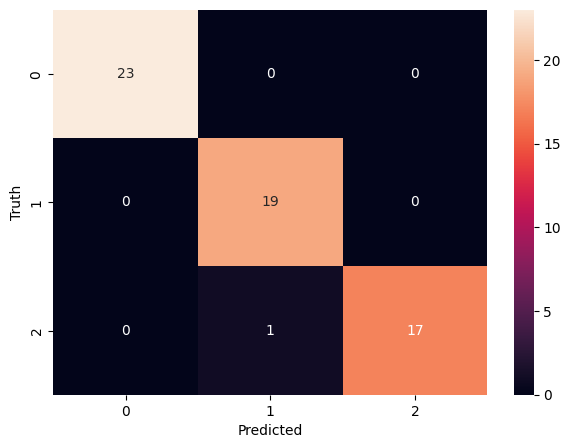

In [38]:
import seaborn as sns
cm=confusion_matrix(ytest, ypred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
